In [4]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1, h2 {color:#3636ff; font-size:110%; font-family:'Orbitron'; text-shadow:5px 5px 5px #aaa;}
p, a {color:darkblue; font-size:120%; text-shadow:5px 5px 5px #aaa;}
</style>


# Calculation of a Function Value by Expanding It in a Series
Create an algorithm and a program

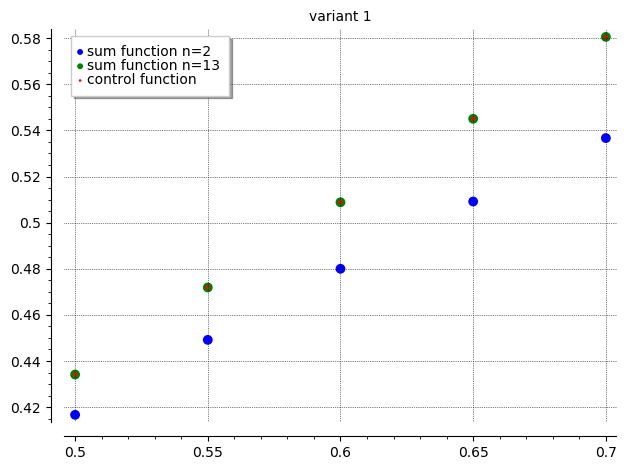

In [1]:
var('k'); E=10^(-4); X1,X2,H=.5,.7,.05; seg=[X1,X1+H,..,X2]
def nfind(controlf,sumf,e):
    cond=True; n=1
    while cond:
        diff=[abs(controlf(x)-sumf(x,n)).n()<e for x in seg]
        cond=sum(diff)!=len(diff); n+=1
    return(n-1)
def nplot(controlf,sumf,n,var):
    sumline3=[[x,sumf(x,2).n()] for x in seg]
    sumline=[[x,sumf(x,n).n()] for x in seg]
    controlline=[[x,controlf(x).n()] for x in seg]
    (list_plot(sumline3,size=50,legend_label='sum function n=2',title='variant %d'%var)+\
     list_plot(sumline,size=50,color='green',legend_label='sum function n=%d'%n)+\
     list_plot(controlline,color='red',legend_label='control function')).show(gridlines=True)
controlf1(x)=3*(x+1)^(1/3)-3
def pf1(x,i):
    if i==0 or i==1: return x
    else: return pf1(x,i-1)*(-x)*(3*i-4)/(3*i)
def sumf1(x,n):
    s=0 
    for i in range(1,n+1): s+=pf1(x,i)
    return s
N1=nfind(controlf1,sumf1,E); nplot(controlf1,sumf1,N1,1)

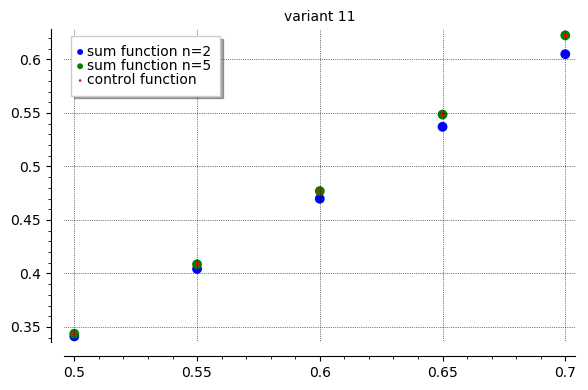

In [2]:
var('k'); E=10^(-4); X1,X2,H=.5,.7,.05; seg=[X1,X1+H,..,X2]
def nfind(controlf,sumf,e):
    cond=True; n=1
    while cond:
        diff=[abs(controlf(x)-sumf(x,n)).n()<e for x in seg]
        cond=sum(diff)!=len(diff); n+=1
    return(n-1)
def nplot(controlf,sumf,n,var):
    sumline3=[[x,sumf(x,2).n()] for x in seg]
    sumline=[[x,sumf(x,n).n()] for x in seg]
    controlline=[[x,controlf(x).n()] for x in seg]
    (list_plot(sumline3,size=50,legend_label='sum function n=2',title='variant %d'%var)+\
     list_plot(sumline,size=50,color='green',legend_label='sum function n=%d'%n)+\
     list_plot(controlline,color='red',legend_label='control function')).show(gridlines=True)
controlf11(x)=2-exp(-x^2)-cos(x)
sumf11(x,n)=sum((-1)^(k+1)*x^(2*k)*(1/factorial(k)+1/factorial(2*k)),k,1,n)
N11=nfind(controlf11,sumf11,E); nplot(controlf11,sumf11,N11,11)

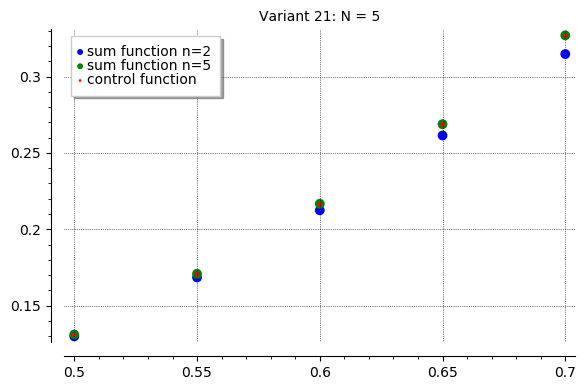

x,sumf(x),controlf(x)
,,
,,
,,
,,
,,


In [2]:
var('k'); E=10^(-4)
X1,X2,H=.5,.7,.05; SEG=[X1,X1+H,..,X2]
def nfind(controlf,sumf,e,seg):
    cond=True; n=1
    while cond:
        diff=[abs(controlf(x)-sumf(x,n)).n()<e for x in seg]
        cond=sum(diff)!=len(diff); n+=1
    return(n-1)
def nplottable(controlf,sumf,n,seg,var):
    t=[['x','sumf(x)','controlf(x)']]
    sumline3,sumlinen,controlline=[],[],[]
    for x in seg:
        t+=[[x,sumf(x,n).n(),controlf(x).n()]]
        sumline3+=[[x,sumf(x,2).n()]]
        sumlinen+=[[x,sumf(x,n).n()]]
        controlline+=[[x,controlf(x).n()]]
    (list_plot(sumline3,size=50,
               legend_label='sum function n=2',
               title='Variant %d: N = %d'%(var,n))+\
     list_plot(sumlinen,size=50,color='green',
               legend_label='sum function n=%d'%n)+\
     list_plot(controlline,color='red',
               legend_label='control function'))\
    .show(gridlines=True) 
    show(table(t))
controlf21(x)=2*x-x*exp(-x^2)-sin(x)
sumf21(x,n)=sum((-1)^(k+1)*x^(2*k+1)*(1/factorial(k)+\
                1/factorial(2*k+1)),k,1,n)
N21=nfind(controlf21,sumf21,E,SEG)
nplottable(controlf21,sumf21,N21,SEG,21)